# Dehli-Indian-Housing-Analysis-Part-5-Predict-Rental-Price-with-Everything-Size-numBedroom-numBathroom-Location-Name-and-House-Type by Dumisani Maxwell Mukuchura

## Dataset Source: https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price

### Contact: dumisanimukuchura@gmail.com | LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/

#### This Project will explore the Dehli Indian Housing and build a model predicting the Rental Price from Everything i.e the following features: House Size, Number of Bedrooms, Number of Bathrooms, Location Name and House Type. A total of 5 features.

## 1. Prepare Data

### Module and Library Import

In [1]:
# OS File and Directory Operations 
import os

#For Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Splitting the Data into Training and Test Data
from sklearn.model_selection import train_test_split

#For One Hot Encoding Categorical Features
from category_encoders import OneHotEncoder

#For Model Building
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

#For Dashboard 
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [2]:
#Import Data building from Part 1 to Part 4 we have Clean DataFrame to be imported 

#Get current working directory
current_dir = os.getcwd()

#Trim to one level above
base_dir = os.path.dirname(current_dir)

#Construct the path to get to the data folder
data_dir = os.path.join(base_dir, "data")

#Construct the full path to the CSV File 
csv_file_path = os.path.join(data_dir, "Dehli-Indian-Housing-Clean-Data.csv")

#Read the CSV file into a DataFrame
housing_data = pd.read_csv(csv_file_path)

#Make a copy and keep the Original Dataset intact
housing_df = housing_data.copy()

housing_df.head()

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
0,Independent Floor,Guru Angad Nagar,Delhi,28.635309,77.224960,13000,INR,2.0,1.0,Negotiable,0.29,Posted 4 years ago,Itâs a 2 bhk builder floor situated in Guru ...,"13,000",Unfurnished,2,BHK,517.0,151.59
1,Independent House,Tuglak Road,Delhi,28.595453,77.210335,2162955,INR,4.0,2.0,Not Negotiable,4.03,Posted a year ago,Well designed 5 bhk independent house is avail...,"65,41,919",Unfurnished,5,BHK,6251.0,25221.02
2,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
3,Independent Floor,Saket,Delhi,28.523548,77.200142,235562,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Itâs a 3 bhk builder floor situated in Saket...,"7,51,225",Unfurnished,3,BHK,2855.0,2746.76
4,Independent Floor,Saket,Delhi,28.523548,77.200142,301011,INR,3.0,2.0,Not Negotiable,1.28,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,10,202",Unfurnished,3,BHK,2741.0,3509.92


## 2. Explore

### Understand the Data in accordance to the selected 5 Features: House Size, Number of Bedrooms, Number of Bathrooms, Location Name and House Type

In [3]:
#Check info of the DataFrame

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          2171 non-null   object 
 1   location            2171 non-null   object 
 2   city                2171 non-null   object 
 3   latitude            2171 non-null   float64
 4   longitude           2171 non-null   float64
 5   price               2171 non-null   int64  
 6   currency            2171 non-null   object 
 7   numBathrooms        2171 non-null   float64
 8   numBalconies        2171 non-null   float64
 9   isNegotiable        2171 non-null   object 
 10  priceSqFt           2171 non-null   float64
 11  verificationDate    2171 non-null   object 
 12  description         2171 non-null   object 
 13  SecurityDeposit     2171 non-null   object 
 14  Status              2171 non-null   object 
 15  numBedroom          2171 non-null   int64  
 16  house_

- We are interested in the following features: house_type, location, numBathrooms, numBedroom, house_size_in_sqft which are in correct variable type bt a rename of numBedroom to numBedrooms is more conventional then we will look into each and everyone of these features 

In [4]:
# Find how many unique values are within the categorical features: house_type, location

unique_house_types = housing_df["house_type"].nunique()
unique_house_locations = housing_df["location"].nunique()

print("Unique Values within House Types:", unique_house_types) 
print("Unique Values within Location Name:", unique_house_locations)

Unique Values within House Types: 6
Unique Values within Location Name: 139


In [5]:
#Renaming numBedroom to numBedrooms
housing_df["numBedrooms"] = housing_df["numBedroom"]
housing_df.drop(columns = ["numBedroom"], inplace =True)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          2171 non-null   object 
 1   location            2171 non-null   object 
 2   city                2171 non-null   object 
 3   latitude            2171 non-null   float64
 4   longitude           2171 non-null   float64
 5   price               2171 non-null   int64  
 6   currency            2171 non-null   object 
 7   numBathrooms        2171 non-null   float64
 8   numBalconies        2171 non-null   float64
 9   isNegotiable        2171 non-null   object 
 10  priceSqFt           2171 non-null   float64
 11  verificationDate    2171 non-null   object 
 12  description         2171 non-null   object 
 13  SecurityDeposit     2171 non-null   object 
 14  Status              2171 non-null   object 
 15  house_layout        2171 non-null   object 
 16  house_

In [6]:
#View Dataframe Statistics
housing_df.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_size_in_sqft,price_approx_usd,numBedrooms
count,2171.000000,2171.000000,2.171000e+03,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.00000
mean,28.566712,77.194739,3.659040e+05,3.385997,2.000921,0.935583,4347.608936,4266.603293,3.60433
std,0.133386,0.064826,3.007127e+05,0.876349,0.490461,0.558816,2063.935942,3506.445355,1.02708
min,22.699059,76.008568,3.600000e+03,1.000000,1.000000,0.050000,150.000000,41.980000,1.00000
25%,28.542767,77.165047,2.824740e+05,3.000000,2.000000,0.600000,2856.000000,3293.775000,3.00000
50%,28.559500,77.206741,3.010220e+05,4.000000,2.000000,0.790000,5852.000000,3510.050000,4.00000
75%,28.578939,77.233330,4.010150e+05,4.000000,2.000000,1.230000,5896.000000,4676.010000,4.00000
max,28.805466,77.336205,3.010101e+06,8.000000,8.000000,4.450000,14521.000000,35099.130000,12.00000


'\nannot=True will display the correlation values in each cell.\n\nfmt=".2f" will format the correlation values to two decimal places.\n\ncmap="coolwarm" is a colormap option for visual appeal (feel free to choose your preferred colormap).\n'

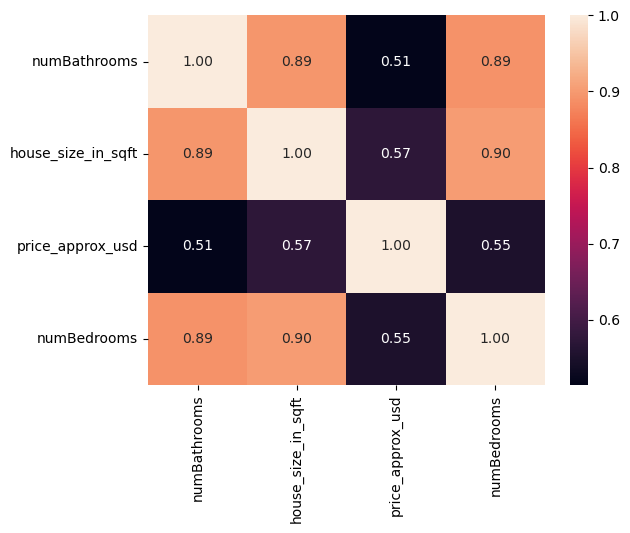

In [7]:
#Use a Heatmap to understand the Correlation of the numBedrooms, numBathrooms, house_size_in_sqft, price_approx_usd

corr = housing_df.select_dtypes("number").drop(columns= ["price", "priceSqFt", "latitude", "longitude", "numBalconies"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")

"""
annot=True will display the correlation values in each cell.

fmt=".2f" will format the correlation values to two decimal places.

cmap="coolwarm" is a colormap option for visual appeal (feel free to choose your preferred colormap).
"""

- We have selected features that have a strong correlation with Approx Price USD but from the way we look at this it affects this building of the model due to MultiCollinearity we notice numBedrooms, numBathrooms and house_size_in_sqft so we shall drop them of them from this analysis as it is approximately 1 i.e 0.90, 0.89
- We shall keep house_size_in_sqft as it has a stronger correlation with Price as compared to numBedrooms and numBathrooms.
- Thus we have effectively been left with 3 features for model building: house_size_in_sqft, location, house_type

## 3. Split Data

### Splitting Data into Training and Test Data

In [8]:
#Creating Feature Matrice and Target Vector

features = ["house_size_in_sqft", "location", "house_type"]
target = "price_approx_usd"
X = housing_df[features]
y = housing_df[target]

#Splitting the data into Training and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size=0.2 means 20% of data goes to test and the 42 is for reproducibility in the randomness

#Confirm the split

print("X_train:\n", X_train.head())
print("X_test:\n", X_test.head())
print("y_train:\n", y_train.head())
print("y_test:\n", y_test.head())
print("Unique Values within Location Name:", X_train["location"].nunique())

X_train:
       house_size_in_sqft            location          house_type
555               6521.0               Saket  Independent Floor 
1435              6251.0        Vasant Vihar  Independent Floor 
588               2856.0       Gulmohar park  Independent Floor 
1532              5896.0  Safdarjung Enclave  Independent House 
20                6251.0       Anand Niketan  Independent Floor 
X_test:
       house_size_in_sqft         location          house_type
1652              5896.0         Jor bagh  Independent Floor 
342               5896.0     Sunder Nagar  Independent Floor 
1342               600.0  Panchsheel Park  Independent Floor 
765               2856.0    Anand Niketan  Independent Floor 
865               6521.0     Vasant Vihar  Independent Floor 
y_train:
 555     3510.05
1435    3512.41
588     3511.12
1532    7463.90
20      4222.55
Name: price_approx_usd, dtype: float64
y_test:
 1652    5877.04
342     3509.93
1342     757.93
765     3509.93
865     3509.92
N

- When we started we had Unique Values within Location Name: 139 but ow they have dropped to 120 meaning 19 unique names fell into the Test Dataset only.

## 4. Build Model

### Create a Baseline - Average Result model